# [葡萄牙波爾圖市計程車旅途時間預測](https://www.kaggle.com/c/pkdd-15-taxi-trip-time-prediction-ii/overview)

## 大綱

- [變數介紹](#變數介紹)
- [資料預處理](#資料預處理)

# []

In [43]:
import numpy as np
import pandas as pd
import json
from math import radians, cos, sin, asin, sqrt
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print('train_shape:', train.shape, 'test_shape', test.shape)

train_shape: (1710670, 9) test_shape (320, 9)


In [4]:
train.head(3)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."


In [6]:
type(train.POLYLINE[0])

str

## 變數介紹

 - TRIP_ID : 旅程程編號(String)
 - CALL_TYPE : 三種叫車方式(char)，A - 乘客叫車由中心指派 ；B - 乘客叫車指定司機；C - 路邊攔車
 - ORIGIN_CALL : 當CALL_TYPE為A，表示乘客叫車的電話號碼(integer)
 - ORIGIN_STAND : 當CALL_TYPE為B，表示計程車接客地點(integer)
 - TAXI_ID : 計程車編號(integer)
 - TIMESTAMP : 時間戳(integer)
 - DAYTYPE : 三種叫車方式(char)，A - 平日或假日；B - 特殊假期；C - 特殊假期B前一天
 - MISSING_DATA : GPS 沒記錄到的旅程(Boolean)
 - POLYLINE : WGS84座標，[ 精度 ，緯度 ]表示(String)，每15秒記錄一次座標

## 資料預處理

In [22]:
#1710670中，刪除MISSING_DATA = Ture
train[train['MISSING_DATA'] == True ].shape

(10, 10)

In [ ]:
a = 

### POLYLINE

In [7]:
train['POLYLINE'] = train['POLYLINE'].apply(json.loads)
train['duration'] = ((train['POLYLINE'].apply(len))-1)*15

In [49]:
train['duration'].describe()

count   1710670.00
mean        716.37
std         684.81
min         -15.00
25%         405.00
50%         600.00
75%         870.00
max       58200.00
Name: duration, dtype: float64

In [58]:
train.shape

(1710670, 10)

In [65]:
#刪除duration = -15，共5901筆
print(train[train['duration'] == -15].shape)
train = train[train['duration'] != -15]
print(train.shape)

(5901, 10)
(1704769, 10)


(-15, 60000, 0.0, 0.000801079676465886)

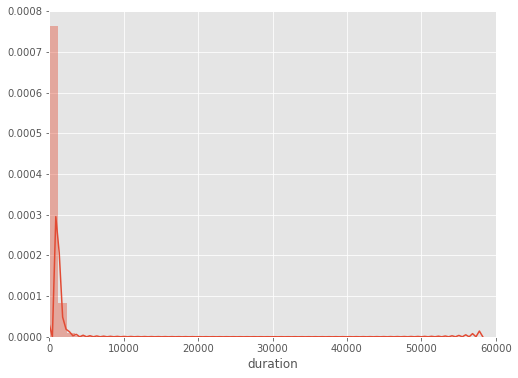

In [69]:
plt.subplots(figsize=(8, 6))
fig = sns.distplot(train.duration)
fig.axis(xmin=-15, xmax=60000)

### CALL_TYPE

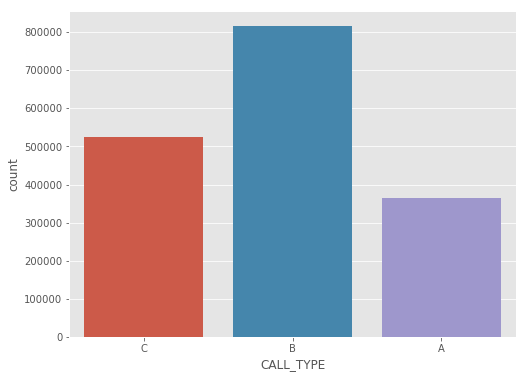

In [70]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(train['CALL_TYPE'])

乘客叫車指定司機(B)的叫車方式較多

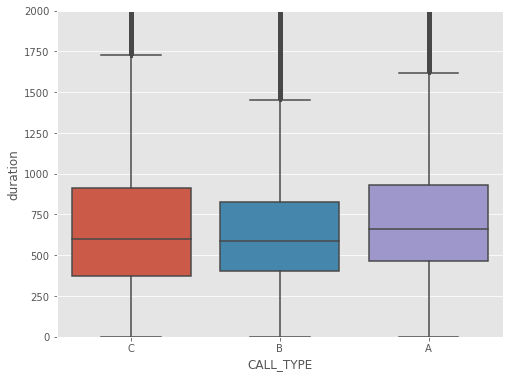

In [77]:
data = pd.concat([train['duration'], train['CALL_TYPE']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='CALL_TYPE', y='duration', data=data)
fig.axis(ymin=0, ymax=2000);

### ORIGIN_CALL

In [83]:
train['ORIGIN_CALL'].unique().shape

(57075,)

In [91]:
train.shape

(1704769, 10)

In [95]:
train.fillna(np.NaN)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,duration
0,1372636858620000589,C,nan,nan,20000589,1372636858,A,False,"[[-8.618643, 41.141412], [-8.618499, 41.141376...",330
1,1372637303620000596,B,nan,7.00,20000596,1372637303,A,False,"[[-8.639847, 41.159826], [-8.640351, 41.159871...",270
2,1372636951620000320,C,nan,nan,20000320,1372636951,A,False,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...",960
3,1372636854620000520,C,nan,nan,20000520,1372636854,A,False,"[[-8.574678, 41.151951], [-8.574705, 41.151942...",630
4,1372637091620000337,C,nan,nan,20000337,1372637091,A,False,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...",420
5,1372636965620000231,C,nan,nan,20000231,1372636965,A,False,"[[-8.615502, 41.140674], [-8.614854, 41.140926...",375
6,1372637210620000456,C,nan,nan,20000456,1372637210,A,False,"[[-8.57952, 41.145948], [-8.580942, 41.145039]...",525
7,1372637299620000011,C,nan,nan,20000011,1372637299,A,False,"[[-8.617563, 41.146182], [-8.617527, 41.145849...",495
8,1372637274620000403,C,nan,nan,20000403,1372637274,A,False,"[[-8.611794, 41.140557], [-8.611785, 41.140575...",555
9,1372637905620000320,C,nan,nan,20000320,1372637905,A,False,"[[-8.615907, 41.140557], [-8.614449, 41.141088...",270


In [86]:
train.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,duration
0,1372636858620000589,C,nan,nan,20000589,1372636858,A,False,"[[-8.618643, 41.141412], [-8.618499, 41.141376...",330
1,1372637303620000596,B,nan,7.00,20000596,1372637303,A,False,"[[-8.639847, 41.159826], [-8.640351, 41.159871...",270
2,1372636951620000320,C,nan,nan,20000320,1372636951,A,False,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...",960
3,1372636854620000520,C,nan,nan,20000520,1372636854,A,False,"[[-8.574678, 41.151951], [-8.574705, 41.151942...",630
4,1372637091620000337,C,nan,nan,20000337,1372637091,A,False,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...",420


In [110]:
#df[df['Col2'].isnull()]
train[train['ORIGIN_STAND'].isnull()]

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,duration
0,1372636858620000589,C,nan,nan,20000589,1372636858,A,False,"[[-8.618643, 41.141412], [-8.618499, 41.141376...",330
2,1372636951620000320,C,nan,nan,20000320,1372636951,A,False,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...",960
3,1372636854620000520,C,nan,nan,20000520,1372636854,A,False,"[[-8.574678, 41.151951], [-8.574705, 41.151942...",630
4,1372637091620000337,C,nan,nan,20000337,1372637091,A,False,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...",420
5,1372636965620000231,C,nan,nan,20000231,1372636965,A,False,"[[-8.615502, 41.140674], [-8.614854, 41.140926...",375
6,1372637210620000456,C,nan,nan,20000456,1372637210,A,False,"[[-8.57952, 41.145948], [-8.580942, 41.145039]...",525
7,1372637299620000011,C,nan,nan,20000011,1372637299,A,False,"[[-8.617563, 41.146182], [-8.617527, 41.145849...",495
8,1372637274620000403,C,nan,nan,20000403,1372637274,A,False,"[[-8.611794, 41.140557], [-8.611785, 41.140575...",555
9,1372637905620000320,C,nan,nan,20000320,1372637905,A,False,"[[-8.615907, 41.140557], [-8.614449, 41.141088...",270
10,1372636875620000233,C,nan,nan,20000233,1372636875,A,False,"[[-8.619894, 41.148009], [-8.620164, 41.14773]...",315


In [104]:
train['ORIGIN_STAND'][0]

nan